In [109]:
import time
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import sys
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
import pickle

In [110]:
sys.path.append("../")

In [111]:
from src.models.models import *

In [119]:
ser = serial.Serial('COM3', 9800, timeout=1)

In [129]:
ser.close()

In [64]:
import serial
import time


ser = serial.Serial('COM3', 9800, timeout=1)
line = ser.readline()
string = line.decode()
stripped_string = string.strip()
num_int = int(stripped_string)
ser.close()

ValueError: invalid literal for int() with base 10: ''

In [127]:
ser.close()

In [128]:
NEW_SAMP_FREQ = 100
ECG_LEN = 10
cnt = 0
elapsed = 0
start = time.time()
ecg =[]
#ser = serial.Serial('COM3', 9800, timeout=1)
ser = serial.Serial('COM3', 9800, timeout=1)
while  elapsed < ECG_LEN:
    elapsed = time.time() - start
    
    line = ser.readline()
    string = line.decode()
    stripped_string = string.strip()
    num_int = int(stripped_string)
    ecg.append(num_int)
    print(num_int)
ser.close()
ecg = np.asarray(ecg)
ecg_resamp = signal.resample(ecg, NEW_SAMP_FREQ*ECG_LEN)
plt.plot(ecg_resamp)
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('ECG reading 10 seconds')
plt.show()


ValueError: invalid literal for int() with base 10: ''

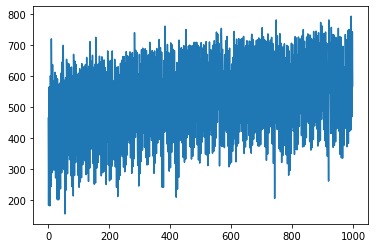

In [123]:
plt.plot(ecg[:1000])

In [122]:
ser.close()

In [83]:
model = build_model((1000,1),1)

In [84]:
model.load_weights("./model_weights_leadII.h5")

In [32]:
np.random.randint(1,10)

8

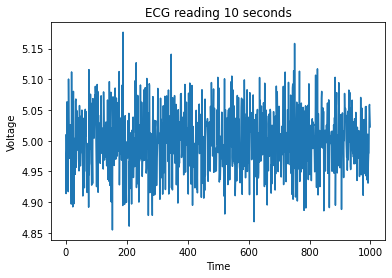

In [45]:
NEW_SAMP_FREQ = 100
ECG_LEN = 10
cnt = 0
elapsed = 0
start = time.time()
ecg =[]

while  elapsed < ECG_LEN:
    elapsed = time.time() - start
    ecg.append(np.random.randint(1,10))

ecg = np.asarray(ecg)
ecg_resamp = signal.resample(ecg, NEW_SAMP_FREQ*ECG_LEN)
plt.plot(ecg_resamp)
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('ECG reading 10 seconds')
plt.show()


In [86]:
ecg_resamp = np.expand_dims(ecg_resamp,-1)

In [87]:
ecg_resamp = np.expand_dims(ecg_resamp,0)

In [92]:
int(model.predict(ecg_resamp)[0][0])

76

In [95]:
print("Predicted age: {} years old".format(int(model.predict(ecg_resamp)[0][0])))

Predicted age: 76 years old


In [22]:
time.time() - start

5.4469451904296875

In [97]:
ecg_resamp

array([[[319.93577353],
        [356.16103215],
        [320.54977815],
        [347.90889468],
        [333.08449645],
        [362.39366677],
        [327.86380181],
        [369.399367  ],
        [258.36825464],
        [302.89068715],
        [484.51271122],
        [331.90404517],
        [325.91702464],
        [318.69855913],
        [316.33661714],
        [311.95973082],
        [305.134728  ],
        [296.37447527],
        [278.30938809],
        [273.66971129],
        [274.10353929],
        [306.17781848],
        [335.74676159],
        [359.05511137],
        [357.01912535],
        [362.44378551],
        [352.85580463],
        [360.24716692],
        [350.19149797],
        [358.69114026],
        [349.9653265 ],
        [358.89955743],
        [352.10713646],
        [360.57682092],
        [350.16857526],
        [363.55643978],
        [352.85491402],
        [359.5385904 ],
        [347.68544589],
        [362.13725136],
        [346.43273941],
        [356.509

In [99]:
ss = StandardScaler()
ss.fit(ecg_resamp[:,:,0])

StandardScaler()

In [103]:
ss_data = apply_standardizer(ecg_resamp,ss)

ValueError: X has 1 features, but StandardScaler is expecting 1000 features as input.

In [101]:
def preprocess_signals(X_train, X_validation, X_test):
    # Standardize data such that mean 0 and variance 1
    ss = StandardScaler()
    ss.fit(np.vstack(X_train).flatten()[:,np.newaxis].astype(float))
    
    # Save Standardizer data
    with open('outputfolder+''standard_scaler.pkl', 'wb') as ss_file:
        pickle.dump(ss, ss_file)

    return apply_standardizer(X_train, ss), apply_standardizer(X_validation, ss), apply_standardizer(X_test, ss)

def apply_standardizer(X, ss):
    X_tmp = []
    for x in X:
        x_shape = x.shape
        X_tmp.append(ss.transform(x.flatten()[:,np.newaxis]).reshape(x_shape))
    X_tmp = np.array(X_tmp)
    return X_tmp

In [104]:
ss.transform(ecg_resamp[:,:,0])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

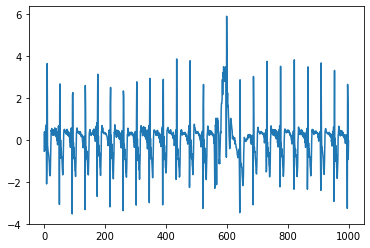

In [107]:
ss = StandardScaler()
plt.plot(ss.fit_transform(ecg_resamp[0,:,:]))

b''
336
b'344\r\n'
344
b'342\r\n'
342
b'338\r\n'
338
b'334\r\n'
334
b'331\r\n'
331
b'329\r\n'
329
b'327\r\n'
327
b'326\r\n'
326
b'331\r\n'
331
b'336\r\n'
336
b'341\r\n'
341
b'345\r\n'
345
b'346\r\n'
346
b'347\r\n'
347
b'348\r\n'
348
b'348\r\n'
348
b'346\r\n'
346
b'342\r\n'
342
b'329\r\n'
329
b'340\r\n'
340
b'349\r\n'
349
b'340\r\n'
340
b'328\r\n'
328
b'344\r\n'
344
b'349\r\n'
349
b'339\r\n'
339
b'331\r\n'
331
b'348\r\n'
348
b'352\r\n'
352
b'337\r\n'
337
b'334\r\n'
334
b'351\r\n'
351
b'353\r\n'
353
b'339\r\n'
339
b'341\r\n'
341
b'357\r\n'
357
b'355\r\n'
355
b'342\r\n'
342
b'349\r\n'
349
b'358\r\n'
358
b'355\r\n'
355
b'344\r\n'
344
b'355\r\n'
355
b'364\r\n'
364
b'354\r\n'
354
b'341\r\n'
341
b'356\r\n'
356
b'358\r\n'
358
b'345\r\n'
345
b'332\r\n'
332
b'348\r\n'
348
b'350\r\n'
350
b'337\r\n'
337
b'333\r\n'
333
b'348\r\n'
348
b'350\r\n'
350
b'336\r\n'
336
b'337\r\n'
337
b'350\r\n'
350
b'348\r\n'
348
b'333\r\n'
333
b'338\r\n'
338
b'350\r\n'
350
b'347\r\n'
347
b'334\r\n'
334
b'346\r\n'
346
b'

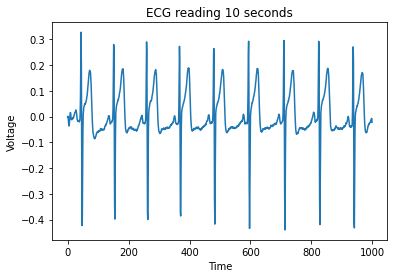

Predicted age: 42 years old


In [150]:
import serial
import time
import tensorflow as tf
from scipy import signal
import matplotlib.pyplot as plt
import sys
import numpy as np
import neurokit2 as nk
from sklearn.preprocessing import MinMaxScaler

sys.path.append("../")
from src.models.models import *

model = build_model((1000,1),1)
model.load_weights("./model_weights_leadI.h5")

NEW_SAMP_FREQ = 100
ECG_LEN = 10
cnt = 0
elapsed = 0
start = time.time()
ecg = []

ser = serial.Serial('COM3', 9800, timeout=1)

while  elapsed < ECG_LEN:
    elapsed = time.time() - start
    
    line = ser.readline()
    print(line)
    string = line.decode()
    stripped_string = string.strip()
    try:
        num_int = int(stripped_string)
    except:
        try: 
            num_int = num_int
        except:
            num_int = 0
    ecg.append(num_int)
    print(num_int)
ser.close()
ecg = np.asarray(ecg)
scaler = MinMaxScaler()
ecg = scaler.fit_transform(np.expand_dims(ecg,1))
ecg_resamp = signal.resample(ecg[:,0], NEW_SAMP_FREQ*ECG_LEN)
ecg_clean = nk.ecg.ecg_clean(ecg_resamp, sampling_rate=100)
ecg_clean = np.expand_dims(np.expand_dims(ecg_clean,0),-1)
plt.plot(ecg_clean[0,:,0])
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('ECG reading 10 seconds')
plt.show()

print("Predicted age: {} years old".format(int(model.predict(ecg_clean)[0][0])))

In [132]:
ecg_resamp.shape

(1, 1000, 1)

In [137]:
ecg_clean = nk.ecg.ecg_clean(ecg_resamp[0], sampling_rate=100)

In [140]:
np.expand_dims(np.expand_dims(ecg_clean,0),-1).shape

(1, 1000, 1)

In [141]:
model.predict(np.expand_dims(np.expand_dims(ecg_clean,0),-1))

array([[56.810116]], dtype=float32)

In [151]:
from multiprocessing import Process

In [ ]:
p1 = Process(target=func1)
p1.start()
p2 = Process(target=func2)
p2.start()


In [158]:
from multiprocessing import Process

def func1():
  print('func1: starting')
  for i in range(10000000):
    pass
  print('func1: finishing')

def func2():
  print('func2: starting')
  for i in range(10000000):
    pass
  print('func2: finishing')

if __name__ == '__main__':
  p1 = Process(target=func1)
  p1.start()
  p2 = Process(target=func2)
  p2.start()
  p1.join()
  p2.join()

In [ ]:
import multiprocessing

def p_get_reading(newport, N, interval, lock, return_dict):
    lock.acquire()
    lock.release()
    reading = newport.get_reading(N, interval)
    return_dict['power_meter'] = reading

def p_capture(camera, N, lock, return_dict):
    lock.acquire()
    lock.release()
    img = camera.capture(N)
    return_dict['image'] = img

if __name__ == "__main__":    
    for i in range(10):
        manager = multiprocessing.Manager()
        return_dict = manager.dict()
        lock = multiprocessing.Lock()
        lock.acquire()
        p = multiprocessing.Process(target=p_capture, args=(camera,10,lock,return_dict))
        p.start()
        p2 = multiprocessing.Process(target=p_get_reading, args=(newport,100,1,lock,return_dict))
        p2.start()
        lock.release()
        p.join()
        p2.join()
        print(return_dict)